# File and libraries

In [57]:
import pandas as pd
import numpy as np


filepath=r'dataset/df_ecom_2_3_outliers_input_v2_dummyfication'


file_tag = "df_ecom_feat_eng_input"

# DSLabs functions

In [58]:
%run "dslabs_functions.py"


dslabs_functions lodaded


# Data functions

In [59]:
%run "data_functions.py"


data_functions loaded


# Load

In [60]:
# test_data=True
test_data=False

# use to evaluate strategies. otherwise False to just transform data 
evaluate=True
#evaluate=False


if test_data==True:

    df=pd.read_csv(f"{filepath}.csv")
    
    test= pd.read_csv(f"{filepath}_test.csv")
    train= pd.read_csv(f"{filepath}_train.csv")

    # sample
    df=df.sample(frac=0.05, replace=False)
    test=test.sample(frac=0.05, replace=False)
    train=train.sample(frac=0.05, replace=False)
    
    # create sample df version of test/train for variance studies
    test_sample= test
    train_sample= train
    
else:
    df=pd.read_csv(f"{filepath}.csv")

    
    test= pd.read_csv(f"{filepath}_test.csv")
    train= pd.read_csv(f"{filepath}_train.csv")

    # create sample for variance studies
    test_sample= test.sample(frac=0.05, replace=False)
    train_sample= train.sample(frac=0.5, replace=False)


 
target='is_purchase'
vars: list[str] = df.columns.to_list()


# ensure sorting by day_of_year for correct splitting 
# "When in the presence of temporal data, data partition shall use older data to train and newer to test, in order to not use future data to classify past data. In any other case, partition shall be random."
df.sort_values(by='day', inplace=True)
test.sort_values(by='day', inplace=True)
train.sort_values(by='day', inplace=True)



df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 177828 entries, 0 to 177827
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   category_code_lvl_1  177828 non-null  float64
 1   category_code_lvl_2  177828 non-null  float64
 2   category_code_lvl_3  177828 non-null  float64
 3   price                177828 non-null  float64
 4   week_of_month        177828 non-null  int64  
 5   is_weekend           177828 non-null  int64  
 6   day                  177828 non-null  int64  
 7   is_view              177828 non-null  int64  
 8   is_cart              177828 non-null  int64  
 9   is_purchase          177828 non-null  int64  
 10  time_of_day_sin      177828 non-null  float64
 11  time_of_day_cos      177828 non-null  float64
 12  day_of_week_sin      177828 non-null  float64
 13  day_of_week_cos      177828 non-null  float64
 14  hour_sin             177828 non-null  float64
 15  hour_cos             1

In [253]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 124479 entries, 0 to 124478
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   category_code_lvl_1  124479 non-null  float64
 1   category_code_lvl_2  124479 non-null  float64
 2   category_code_lvl_3  124479 non-null  float64
 3   price                124479 non-null  float64
 4   week_of_month        124479 non-null  float64
 5   is_weekend           124479 non-null  float64
 6   day                  124479 non-null  float64
 7   is_view              124479 non-null  float64
 8   is_cart              124479 non-null  float64
 9   time_of_day_sin      124479 non-null  float64
 10  time_of_day_cos      124479 non-null  float64
 11  day_of_week_sin      124479 non-null  float64
 12  day_of_week_cos      124479 non-null  float64
 13  hour_sin             124479 non-null  float64
 14  hour_cos             124479 non-null  float64
 15  min_sin              1

In [107]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 124479 entries, 0 to 124478
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   category_code_lvl_1  124479 non-null  float64
 1   category_code_lvl_2  124479 non-null  float64
 2   category_code_lvl_3  124479 non-null  float64
 3   price                124479 non-null  float64
 4   week_of_month        124479 non-null  float64
 5   is_weekend           124479 non-null  float64
 6   day                  124479 non-null  float64
 7   is_view              124479 non-null  float64
 8   is_cart              124479 non-null  float64
 9   time_of_day_sin      124479 non-null  float64
 10  time_of_day_cos      124479 non-null  float64
 11  day_of_week_sin      124479 non-null  float64
 12  day_of_week_cos      124479 non-null  float64
 13  hour_sin             124479 non-null  float64
 14  hour_cos             124479 non-null  float64
 15  min_sin              1

In [256]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 177828 entries, 0 to 177827
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   category_code_lvl_1  177828 non-null  float64
 1   category_code_lvl_2  177828 non-null  float64
 2   category_code_lvl_3  177828 non-null  float64
 3   price                177828 non-null  float64
 4   week_of_month        177828 non-null  int64  
 5   is_weekend           177828 non-null  int64  
 6   day                  177828 non-null  int64  
 7   is_view              177828 non-null  int64  
 8   is_cart              177828 non-null  int64  
 9   is_purchase          177828 non-null  int64  
 10  time_of_day_sin      177828 non-null  float64
 11  time_of_day_cos      177828 non-null  float64
 12  day_of_week_sin      177828 non-null  float64
 13  day_of_week_cos      177828 non-null  float64
 14  hour_sin             177828 non-null  float64
 15  hour_cos             1

# Feat 1 - Dropping Low Variance Variables

## Feat 1 - Study Low Variance Variables and Threshold

using sampled dataframe due to heavy processing

In [106]:

def study_variance_for_feature_selection(
    train: DataFrame,
    test: DataFrame,
    target: str = "class",
    max_threshold: float = 0.3,
    lag: float = 0.03,
    metric: str = "accuracy",
    file_tag: str = "",
    min_features_to_keep: int = 10  # Minimum features safeguard
) -> dict:
    # Generate the range of variance thresholds to test
    options: list[float] = [
        round(i * lag, 3) for i in range(1, ceil(max_threshold / lag + lag))
    ]
    
    results: dict[str, list] = {"NB": [], "KNN": []}
    summary5: DataFrame = train.describe()
    
    for thresh in options:
        print(f"Testing threshold: {thresh}")
        
        # Calculate variance and select variables to drop
        variances = summary5.loc["std"] ** 2
        vars2drop: Index[str] = summary5.columns[variances < thresh]

        # Ensure we don't drop the target column
        if target in vars2drop:
            vars2drop = vars2drop.drop(target)

        # Safeguard: Ensure we don't drop too many features
        remaining_features = train.drop(vars2drop, axis=1).shape[1]
        if remaining_features < min_features_to_keep:
            print(f"Threshold too strict at {thresh}, adjusting to retain at least {min_features_to_keep} features.")
            # Adjust threshold dynamically
            vars2drop = summary5.columns[variances < thresh / 2]
            remaining_features = train.drop(vars2drop, axis=1).shape[1]
            if remaining_features < min_features_to_keep:
                print(f"Still too strict, keeping all variables for this threshold.")
                vars2drop = Index([])  # Don't drop any variables

        print(f"Dropping variables: {list(vars2drop)}")
        print(f"Remaining features after drop: {remaining_features}")

        # Drop the low variance variables from train and test sets
        train_copy: DataFrame = train.drop(vars2drop, axis=1, inplace=False)
        test_copy: DataFrame = test.drop(vars2drop, axis=1, inplace=False)


        # Evaluate the approach using the current feature set
        eval: dict[str, list] | None = evaluate_approach(
            train_copy, test_copy, target=target, metric=metric
        )

        # Check if evaluation returned results
        if eval:
            print(f"Evaluation results at threshold {thresh}: {eval}")
            if metric in eval:
                print(f"Evaluation for {metric}: {eval[metric]}")
                results["NB"].append(eval[metric][0])
                results["KNN"].append(eval[metric][1])
            else:
                print(f"Metric '{metric}' not found in evaluation results at threshold {thresh}.")
                results["NB"].append(None)
                results["KNN"].append(None)
        else:
            print(f"Evaluation failed or returned empty at threshold {thresh}.")
            results["NB"].append(None)
            results["KNN"].append(None)
            



    # Plotting the results of the variance study
    plot_multiline_chart(
        options,
        results,
        title=f"{file_tag} variance study ({metric})",
        xlabel="Variance threshold",
        ylabel=metric,
        percentage=True,
    )
    savefig(f"images/{file_tag}_fs_low_var_{metric}_study.png")
    return results

### recall

Testing threshold: 0.005
Dropping variables: ['time_of_day_sin']
Remaining features after drop: 17
Evaluation results at threshold 0.005: {'accuracy': [1.0, 0.9268841394825647], 'recall': [1.0, 0.07407407407407407], 'precision': [1.0, 0.07766990291262135], 'auc': [1.0, 0.5184750987799053], 'f1': [1.0, 0.07582938388625593]}
Evaluation for recall: [1.0, 0.07407407407407407]
Testing threshold: 0.01
Dropping variables: ['time_of_day_sin']
Remaining features after drop: 17
Evaluation results at threshold 0.01: {'accuracy': [1.0, 0.9268841394825647], 'recall': [1.0, 0.07407407407407407], 'precision': [1.0, 0.07766990291262135], 'auc': [1.0, 0.5184750987799053], 'f1': [1.0, 0.07582938388625593]}
Evaluation for recall: [1.0, 0.07407407407407407]
Testing threshold: 0.015
Dropping variables: ['time_of_day_sin']
Remaining features after drop: 17
Evaluation results at threshold 0.015: {'accuracy': [1.0, 0.9268841394825647], 'recall': [1.0, 0.07407407407407407], 'precision': [1.0, 0.077669902912621

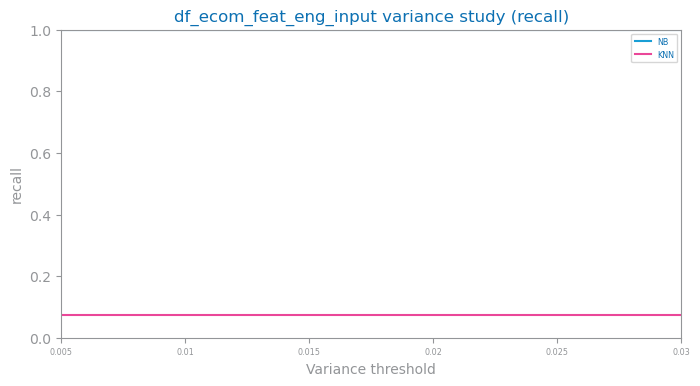

In [161]:
# modified study_variance_for_feature_selection() in dslabs functions to keep minimum variables and print metrics (due to error)
if evaluate==True:

    eval_metric = "recall"
    figure(figsize=(2 * HEIGHT, HEIGHT))
    study_variance_for_feature_selection(
        train_sample,
        test_sample,
        target=target,
        max_threshold=0.03,
        lag=0.005,
        metric=eval_metric,
        file_tag=file_tag,
        min_features_to_keep = 10  # Minimum features safeguard

    )
    show()

### accuracy study

Testing threshold: 0.01
Dropping variables: ['time_of_day_sin']
Remaining features after drop: 17
Evaluation results at threshold 0.01: {'accuracy': [1.0, 0.9595050618672666], 'recall': [1.0, 0.0], 'precision': [1.0, 0.0], 'auc': [1.0, 0.5], 'f1': [1.0, 0.0]}
Evaluation for accuracy: [1.0, 0.9595050618672666]
Testing threshold: 0.02
Dropping variables: ['time_of_day_sin']
Remaining features after drop: 17
Evaluation results at threshold 0.02: {'accuracy': [1.0, 0.9595050618672666], 'recall': [1.0, 0.0], 'precision': [1.0, 0.0], 'auc': [1.0, 0.5], 'f1': [1.0, 0.0]}
Evaluation for accuracy: [1.0, 0.9595050618672666]
Testing threshold: 0.03
Dropping variables: ['time_of_day_sin']
Remaining features after drop: 17
Evaluation results at threshold 0.03: {'accuracy': [1.0, 0.9595050618672666], 'recall': [1.0, 0.0], 'precision': [1.0, 0.0], 'auc': [1.0, 0.5], 'f1': [1.0, 0.0]}
Evaluation for accuracy: [1.0, 0.9595050618672666]
Testing threshold: 0.04
Dropping variables: ['time_of_day_sin']
Rem

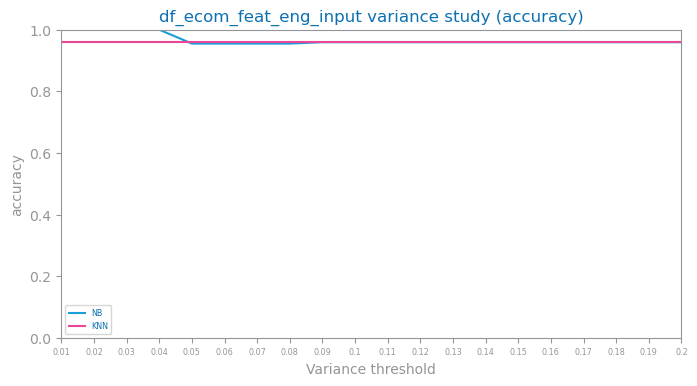

In [158]:
if evaluate==True:

    eval_metric = "accuracy"
    figure(figsize=(2 * HEIGHT, HEIGHT))
    study_variance_for_feature_selection(
        train_sample,
        test_sample,
        target=target,
        max_threshold=0.2,
        lag=0.01,
        metric=eval_metric,
        file_tag=file_tag,
        min_features_to_keep = 10  # Minimum features safeguard

    )
    show()

## Feat 1 strategy Application

## Feat 1 strategy Application

In [110]:
from pandas import DataFrame, Index

def apply_strategy_1(df: DataFrame) -> DataFrame:

    # this script is available in data_functions originally from DSLabs site in Feature Selection chapter

    df_copy=df.copy()
    
    vars2drop: list[str] = select_low_variance_variables(df_copy, max_threshold=0.03, min_features_to_keep=10, target=target)
    
    print("columns to drop:", vars2drop)

    df_vars_drop = df_copy.drop(columns=vars2drop, errors='ignore')
    
    print("Remaining columns:", df_vars_drop.columns)

    return df_vars_drop


df_1=apply_strategy_1(df)

df_1.describe()


Variance threshold: 0.03, Remaining features: 17
Variables to drop: ['time_of_day_sin']
columns to drop: ['time_of_day_sin']
Remaining columns: Index(['category_code_lvl_1', 'category_code_lvl_2', 'category_code_lvl_3',
       'price', 'week_of_month', 'is_weekend', 'day', 'is_view', 'is_cart',
       'is_purchase', 'time_of_day_cos', 'day_of_week_sin', 'day_of_week_cos',
       'hour_sin', 'hour_cos', 'min_sin', 'min_cos'],
      dtype='object')


,category_code_lvl_1,category_code_lvl_2,category_code_lvl_3,price,week_of_month,is_weekend,day,is_view,is_cart,is_purchase,time_of_day_cos,day_of_week_sin,day_of_week_cos,hour_sin,hour_cos,min_sin,min_cos
count,177828.000000,177828.000000,177828.000000,177828.000000,177828.000000,177828.000000,177828.000000,177828.000000,177828.000000,177828.000000,177828.000000,177828.000000,177828.000000,177828.000000,177828.000000,177828.000000,177828.000000
mean,5.374249,32.385451,76.852436,256.363629,1.892953,0.266010,16.044211,0.910565,0.048631,0.040803,0.196606,0.561860,0.239906,0.002955,-0.267871,-0.004530,0.016729
std,4.156760,20.773715,42.369605,273.986783,1.214212,0.441871,8.367891,0.285371,0.215097,0.197835,0.980485,0.381122,0.693890,0.750061,0.602574,0.701795,0.712168
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,-0.866000,-0.998000,-0.991000,-1.000000,-0.999000
25%,2.000000,15.000000,47.000000,55.187500,1.000000,0.000000,9.000000,1.000000,0.000000,0.000000,-1.000000,-0.000000,-0.500000,-0.817000,-0.776000,-0.716000,-0.698000
50%,5.000000,36.000000,83.000000,154.420000,2.000000,0.000000,17.000000,1.000000,0.000000,0.000000,1.000000,0.500000,0.500000,0.000000,-0.335000,-0.000000,0.080000
75%,11.000000,57.000000,125.000000,354.450000,3.000000,1.000000,23.000000,1.000000,0.000000,0.000000,1.000000,0.866000,1.000000,0.817000,0.203000,0.678000,0.735000
max,12.000000,61.000000,134.000000,993.422936,4.000000,1.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.998000,0.944296,1.000000,1.000000


## Feat 1 train/test split 

Labels=[0, 1]


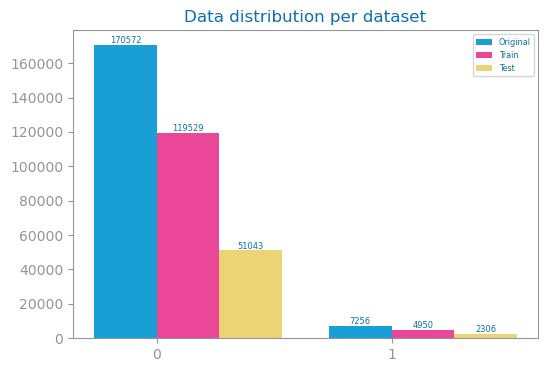

In [111]:
if evaluate==True:

    from pandas import concat
    from matplotlib.pyplot import figure, show
    from sklearn.model_selection import train_test_split
    from dslabs_functions import plot_multibar_chart


    # Call the function to split the data
    from numpy import array, ndarray


    y_1, X_1, labels, values = define_target_and_prepare_data(df_1, target)



    train_1, test_1 = split_data_save_csv(pd.DataFrame(X_1, columns=df_1.columns), y_1, data_columns=df_1.columns, target_column=target)

    # Distribution check
    values["Train"] = [
        len(train_1[train_1[target] == 0]),
        len(train_1[train_1[target] == 1]),
    ]
    values["Test"] = [
        len(test_1[test_1[target] == 0]),
        len(test_1[test_1[target] == 1]),
    ]

    # Visualize the distribution
    figure(figsize=(6, 4))
    plot_multibar_chart(labels, values, title="Data distribution per dataset")
    show()

## Feat 1 evaluate

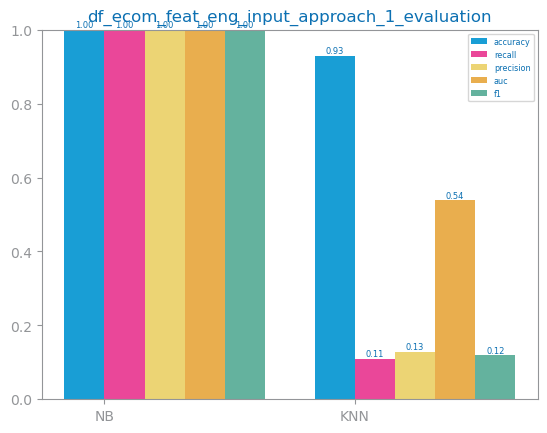

In [112]:
if evaluate==True:

    # evaluate_approach is in data_functions originally from DSLABS/ Data Prep / Methodology
    # removed Multinomial from run_NB function because dataset has negative values

    figure()
    eval_1: dict[str, list] = evaluate_approach(train_1, test_1, target='is_purchase', metric="recall")
    plot_multibar_chart(
        ["NB", "KNN"], eval_1, title=f"{file_tag}_approach_1_evaluation", percentage=True
    )
    savefig(f"images/{file_tag}_approach_1_evaluation.png")
    show()

# Feat 2 - Dropping Redundant Variables


In [20]:


def study_redundancy_for_feature_selection(
    train: DataFrame,
    test: DataFrame,
    target: str = "class",
    min_threshold: float = 0.1,
    lag: float = 0.03,
    metric: str = "accuracy",
    file_tag: str = "",
) -> dict:
    # Generate the range of redundancy thresholds to test
    options: list[float] = [
        round(min_threshold + i * lag, 3)
        for i in range(ceil((1 - min_threshold) / lag) + 1)
    ]

    # Ensure 'target' column is present and drop it for correlation calculation
    df: DataFrame = train.drop(target, axis=1, inplace=False)
    print(f"Columns in the train dataset: {df.columns.tolist()}")  # Debugging step

    # Calculate the correlation matrix
    corr_matrix: DataFrame = abs(df.corr())
    variables: Index[str] = corr_matrix.columns
    print(f"Variables considered for correlation: {variables.tolist()}")  # Debugging step

    results: dict[str, list] = {"NB": [], "KNN": []}
    
    for thresh in options:
        vars2drop: list = []
        
        # Loop through the variables to identify correlated features
        for v1 in variables:
            # Get features correlated with the current variable
            vars_corr: Series = (corr_matrix[v1]).loc[corr_matrix[v1] >= thresh]
            
            # Check if the current variable is in the correlation list before trying to drop it
            if v1 in vars_corr:
                vars_corr.drop(v1, inplace=True)
            
            # If other variables are highly correlated with v1, consider them for removal
            if len(vars_corr) > 1:
                lst_corr = list(vars_corr.index)
                for v2 in lst_corr:
                    if v2 not in vars2drop:
                        vars2drop.append(v2)

        print(f"Variables to drop at threshold {thresh}: {vars2drop}")  # Debugging step
        
        # Drop the selected redundant variables from train and test datasets
        train_copy: DataFrame = train.drop(vars2drop, axis=1, inplace=False)
        test_copy: DataFrame = test.drop(vars2drop, axis=1, inplace=False)

        # Evaluate the approach using the current feature set
        eval: dict | None = evaluate_approach(train_copy, test_copy, target=target, metric=metric)

        # Check if evaluation returned results
        if eval:
            print(f"Evaluation results at threshold {thresh}: {eval}")
            if metric in eval:
                print(f"Evaluation for {metric}: {eval[metric]}")
                results["NB"].append(eval[metric][0])
                results["KNN"].append(eval[metric][1])
            else:
                print(f"Metric '{metric}' not found in evaluation results at threshold {thresh}.")
                results["NB"].append(None)
                results["KNN"].append(None)
        else:
            print(f"Evaluation failed or returned empty at threshold {thresh}.")
            results["NB"].append(None)
            results["KNN"].append(None)

    # Optional: Save or plot the results after evaluation
    plot_multiline_chart(
        options,
        results,
        title=f"{file_tag} redundancy study ({metric})",
        xlabel="correlation threshold",
        ylabel=metric,
        percentage=True,
    )
    savefig(f"images/{file_tag}_fs_redundancy_{metric}_study.png")
    return results

In [211]:
test.columns

Index(['category_code_lvl_1', 'category_code_lvl_2', 'category_code_lvl_3',
       'price', 'week_of_month', 'is_weekend', 'day', 'is_view', 'is_cart',
       'time_of_day_sin', 'time_of_day_cos', 'day_of_week_sin',
       'day_of_week_cos', 'hour_sin', 'hour_cos', 'min_sin', 'min_cos',
       'is_purchase'],
      dtype='object')

Columns in the train dataset: ['category_code_lvl_1', 'category_code_lvl_2', 'category_code_lvl_3', 'price', 'week_of_month', 'is_weekend', 'day', 'is_view', 'is_cart', 'time_of_day_sin', 'time_of_day_cos', 'day_of_week_sin', 'day_of_week_cos', 'hour_sin', 'hour_cos', 'min_sin', 'min_cos']
Variables considered for correlation: ['category_code_lvl_1', 'category_code_lvl_2', 'category_code_lvl_3', 'price', 'week_of_month', 'is_weekend', 'day', 'is_view', 'is_cart', 'time_of_day_sin', 'time_of_day_cos', 'day_of_week_sin', 'day_of_week_cos', 'hour_sin', 'hour_cos', 'min_sin', 'min_cos']
Variables to drop at threshold 0.001: ['category_code_lvl_2', 'category_code_lvl_3', 'price', 'week_of_month', 'is_weekend', 'day', 'is_view', 'is_cart', 'time_of_day_cos', 'day_of_week_sin', 'day_of_week_cos', 'hour_sin', 'hour_cos', 'min_sin', 'category_code_lvl_1', 'min_cos']
Evaluation failed or returned empty at threshold 0.001.
Variables to drop at threshold 0.201: ['category_code_lvl_2', 'category_co

TypeError: '<' not supported between instances of 'NoneType' and 'int'

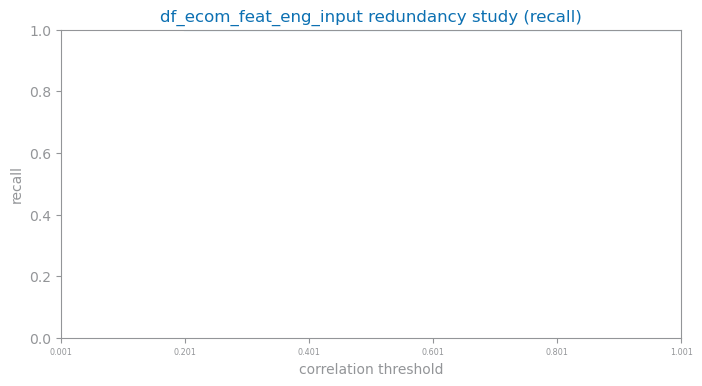

In [21]:
if evaluate==True:

    # modified study_variance_for_feature_selection() in dslabs functions to keep minimum variables and print metrics (due to error)


    eval_metric = "recall"
    figure(figsize=(2 * HEIGHT, HEIGHT))
    study_redundancy_for_feature_selection(
        train_sample,
        test_sample,
        target=target,
        min_threshold = 0.001,
        lag = 0.2,
        metric=eval_metric,
        file_tag=file_tag,
    )
    show()

Columns in the train dataset: ['category_code_lvl_1', 'category_code_lvl_2', 'category_code_lvl_3', 'price', 'week_of_month', 'is_weekend', 'day', 'is_view', 'is_cart', 'time_of_day_sin', 'time_of_day_cos', 'day_of_week_sin', 'day_of_week_cos', 'hour_sin', 'hour_cos', 'min_sin', 'min_cos']
Variables considered for correlation: ['category_code_lvl_1', 'category_code_lvl_2', 'category_code_lvl_3', 'price', 'week_of_month', 'is_weekend', 'day', 'is_view', 'is_cart', 'time_of_day_sin', 'time_of_day_cos', 'day_of_week_sin', 'day_of_week_cos', 'hour_sin', 'hour_cos', 'min_sin', 'min_cos']
Variables to drop at threshold 0.05: ['category_code_lvl_2', 'category_code_lvl_3', 'price', 'is_view', 'is_cart', 'category_code_lvl_1', 'week_of_month', 'day', 'is_weekend', 'day_of_week_sin', 'day_of_week_cos', 'hour_sin', 'hour_cos']
Evaluation results at threshold 0.05: {'accuracy': [0.9587551556055494, 0.9587551556055494], 'recall': [0.0, 0.0], 'precision': [0.0, 0.0], 'auc': [0.5, 0.5], 'f1': [0.0, 0

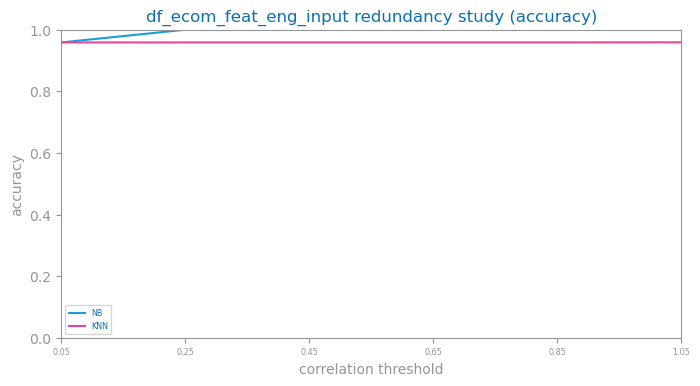

In [221]:
if evaluate==True:

    # modified study_variance_for_feature_selection() in dslabs functions to keep minimum variables and print metrics (due to error)


    eval_metric = "accuracy"
    figure(figsize=(2 * HEIGHT, HEIGHT))
    study_redundancy_for_feature_selection(
        train_sample,
        test_sample,
        target=target,
        min_threshold = 0.05,
        lag = 0.2,
        metric=eval_metric,
        file_tag=file_tag,
    )
    show()

## Feat 2 - Study redundant variables and threshold

## Feat 2 strategy aplication

In [90]:
from pandas import DataFrame, Series

def select_redundant_variables(data: DataFrame, min_threshold: float = 1.5, target: str = "class") -> list:
    # Verifica se a coluna target existe no DataFrame
    if target not in data.columns:
        raise KeyError(f"Target column '{target}' not found in DataFrame.")
    
    # Remover espaços em branco dos nomes das colunas
    data.columns = data.columns.str.strip()

    # Copiar o DataFrame e remover a coluna target
    df: DataFrame = data.drop(target, axis=1, inplace=False)

    # Calcular a matriz de correlação absoluta
    corr_matrix: DataFrame = abs(df.corr())
    
    # Lista de variáveis a remover
    vars2drop: list = []

    # Obter as colunas do DataFrame
    variables: Index[str] = corr_matrix.columns

    # Iterar sobre as variáveis
    for v1 in variables:
        vars_corr: Series = corr_matrix[v1].loc[corr_matrix[v1] >= min_threshold]

        # Remover a autocorrelação (com a própria variável)
        vars_corr = vars_corr.drop(v1, errors='ignore')

        # Verificar se há mais de uma correlação forte
        if len(vars_corr) > 1:
            lst_corr = list(vars_corr.index)

            # Adicionar variáveis correlacionadas à lista de remoção, se ainda não estiverem
            for v2 in lst_corr:
                if v2 not in vars2drop:
                    vars2drop.append(v2)

    return vars2drop


In [102]:
def apply_strategy_2(df):
    df_copy = df.copy()

    # Garantir que a coluna 'is_purchase' não será removida
    vars2drop = select_redundant_variables(df_copy, min_threshold=0.9, target=target)
    print("columns to drop:", vars2drop)

    # Remover variáveis redundantes, mas garantir que 'is_purchase' não é removida
    df_vars_drop = df_copy.drop(columns=[col for col in vars2drop if col != 'is_purchase'], errors='ignore')
    
    print("Remaining columns:", df_vars_drop.columns)

    return df_vars_drop

df_2=df.copy()

df_2=apply_strategy_2(df_2)

columns to drop: ['category_code_lvl_2', 'category_code_lvl_3', 'category_code_lvl_1']
Remaining columns: Index(['price', 'week_of_month', 'is_weekend', 'day', 'is_view', 'is_cart',
       'is_purchase', 'time_of_day_sin', 'time_of_day_cos', 'day_of_week_sin',
       'day_of_week_cos', 'hour_sin', 'hour_cos', 'min_sin', 'min_cos'],
      dtype='object')


In [81]:
print(df_2.columns)


Index(['price', 'week_of_month', 'is_weekend', 'day', 'is_view', 'is_cart',
       'is_purchase', 'time_of_day_sin', 'time_of_day_cos', 'day_of_week_sin',
       'day_of_week_cos', 'hour_sin', 'hour_cos', 'min_sin', 'min_cos'],
      dtype='object')


## Feat 2 train/test split 

Labels=[0, 1]


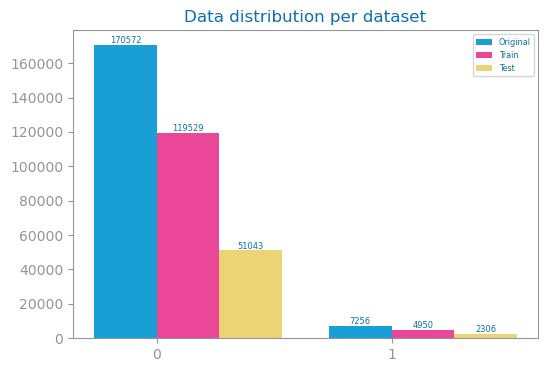

In [103]:
if evaluate==True:

    from pandas import concat
    from matplotlib.pyplot import figure, show
    from sklearn.model_selection import train_test_split
    from dslabs_functions import plot_multibar_chart


    # Call the function to split the data
    from numpy import array, ndarray


    y_2, X_2, labels, values = define_target_and_prepare_data(df_2, target)



    train_2, test_2 = split_data_save_csv(pd.DataFrame(X_2, columns=df_2.columns), y_2, data_columns=df_2.columns, target_column=target)

    # Distribution check
    values["Train"] = [
        len(train_2[train_2[target] == 0]),
        len(train_2[train_2[target] == 1]),
    ]
    values["Test"] = [
        len(test_2[test_2[target] == 0]),
        len(test_2[test_2[target] == 1]),
    ]

    # Visualize the distribution
    figure(figsize=(6, 4))
    plot_multibar_chart(labels, values, title="Data distribution per dataset")
    show()

## Feat 2 evaluate

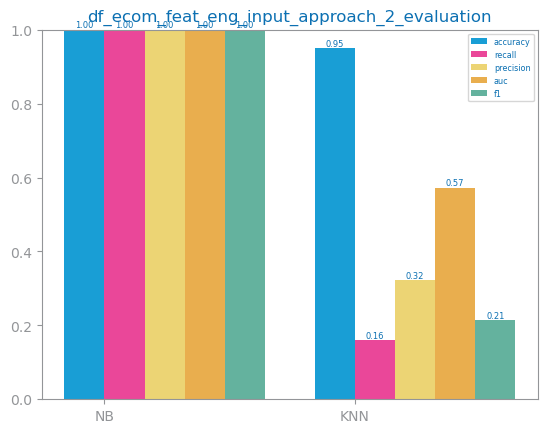

In [104]:
if evaluate == True:
    figure()
    eval_2: dict[str, list] = evaluate_approach(train_2, test_2, target='is_purchase', metric="recall")
    plot_multibar_chart(
        ["NB", "KNN"], eval_2, title=f"{file_tag}_approach_2_evaluation", percentage=True
    )
    savefig(f"images/{file_tag}_approach_2_evaluation.png")
    show()

# Approach uplift comparison

## uplift df

In [113]:
if evaluate == True:
    
    algorithms = ['Naive Bayes', 'KNN']

    # Create DataFrames for eval_1 and eval_2
    df_eval_1 = pd.DataFrame(eval_1, index=algorithms)
    df_eval_2 = pd.DataFrame(eval_2, index=algorithms)

    # Calculate uplift
    df_uplift = df_eval_2 - df_eval_1



    # Combine everything into one DataFrame (without misalignment issues)
    comparison_df = pd.concat([df_eval_1, df_eval_2, df_uplift], axis=1)
    comparison_df.columns = pd.MultiIndex.from_product([['Approach 1', 'Approach 2', 'Uplift'], eval_1.keys()])



    # Display the DataFrame
    display(comparison_df)

Approach 1                                         Approach 2  \
              accuracy    recall precision       auc        f1   accuracy   
Naive Bayes   1.000000  1.000000   1.00000  1.000000  1.000000   1.000000   
KNN           0.929483  0.109714   0.12895  0.538116  0.118557   0.949165   

                                                       Uplift            \
               recall precision       auc        f1  accuracy    recall   
Naive Bayes  1.000000  1.000000  1.000000  1.000000  0.000000  0.000000   
KNN          0.160451  0.322862  0.572624  0.214368  0.019682  0.050737   

                                           
            precision       auc        f1  
Naive Bayes  0.000000  0.000000  0.000000  
KNN          0.193912  0.034508  0.095812

# Analysis

- NB (better on approach 2): 
    - Scale1 accuracy 0.33, recall 0.87, auc 0.51
    - scale2 accuracy 0.43 recall 0.82, auc 0.56
- KNN: no significant uplifts between approaches
- overall scale 2 vs outliers treatment
    - very significant improved recall
    - significant accuracy loss


# save to csv

In [ ]:
if test_data==False:
    
    
    data_save=data.copy()

    data_save=apply_strategy_1(data_save)
        
    data_save.to_csv(f"data/df_merch_6_feat_eng_input.csv", index=False)


    print(data_save.columns)



Variance threshold: 0.024, Remaining features: 40
Variables to drop: ['event_name', 'device_mobile_brand_name']
columns to drop: ['event_name', 'device_mobile_brand_name']
Remaining columns: Index(['device_category', 'device_mobile_model_name',
       'device_operating_system', 'device_operating_system_version',
       'device_language', 'device_web_info_browser',
       'device_web_info_browser_version', 'geo_region', 'geo_city',
       'traffic_source_medium', 'traffic_source_source',
       'engagement_time_msec', 'month', 'day_of_year', 'week_number',
       'page_path_level_1', 'page_path_level_2', 'page_path_level_3',
       'path_length', 'time_of_day_sin', 'time_of_day_cos', 'local_hour_sin',
       'local_hour_cos', 'local_minute_sin', 'local_minute_cos',
       'hour_minute_fraction_sin', 'hour_minute_fraction_cos', 'day_sin',
       'day_cos', 'day_of_week_nr_sin', 'day_of_week_nr_cos',
       'week_of_month_nr_sin', 'week_of_month_nr_cos', 'geo_country',
       'session_eng

## train test csv

In [ ]:
if test_data==False:
    

    data_save_copy=data_save.copy()

    
    y, X, labels, class_counts = define_target_and_prepare_data(data_save_copy, target=target)

    train, test = split_data_save_csv(pd.DataFrame(X, columns=data_save_copy.columns), y, data_columns=data_save_copy.columns, target_column=target)  
    
    train.to_csv(f"data/df_merch_6_feat_eng_input_train.csv", index=False)
    print(train.columns)
    
    test.to_csv(f"data/df_merch_6_feat_eng_input_test.csv", index=False)
    print(test.columns)

Labels=[0.0, 1.0]
Index(['device_category', 'device_mobile_model_name',
       'device_operating_system', 'device_operating_system_version',
       'device_language', 'device_web_info_browser',
       'device_web_info_browser_version', 'geo_region', 'geo_city',
       'traffic_source_medium', 'traffic_source_source',
       'engagement_time_msec', 'month', 'day_of_year', 'week_number',
       'page_path_level_1', 'page_path_level_2', 'page_path_level_3',
       'path_length', 'time_of_day_sin', 'time_of_day_cos', 'local_hour_sin',
       'local_hour_cos', 'local_minute_sin', 'local_minute_cos',
       'hour_minute_fraction_sin', 'hour_minute_fraction_cos', 'day_sin',
       'day_cos', 'day_of_week_nr_sin', 'day_of_week_nr_cos',
       'week_of_month_nr_sin', 'week_of_month_nr_cos', 'geo_country',
       'session_engaged', 'year', 'quarter', 'is_weekend', 'domain',
       'returning_user'],
      dtype='object')
Index(['device_category', 'device_mobile_model_name',
       'device_operat

In [79]:

def define_target_and_prepare_data(df: pd.DataFrame, target: str) -> Tuple[np.ndarray, pd.Series, List[int], Dict[str, List[int]]]:
    """
    Defines the target variable and prepares the feature set and target labels.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    target (str): The name of the target variable.

    Returns:
    Tuple[np.ndarray, pd.Series, List[int], Dict[str, List[int]]]: A tuple containing:
        - y (pd.Series): The target variable.
        - X (np.ndarray): The feature set.
        - labels (List[int]): Sorted list of unique labels.
        - values (Dict[str, List[int]]): Counts of original classes.
    
    Raises:
    KeyError: If the target variable is not found in the DataFrame.
    """
    
    # Check if the target exists in the DataFrame
    if target not in df.columns:
        raise KeyError(f"The target column '{target}' does not exist in the DataFrame. Available columns are: {df.columns.tolist()}")

    # Extract labels and sort them
    labels: list = list(df[target].unique())
    labels.sort()
    print(f"Labels={labels}")

    # Create a dictionary to store original class counts
    values: dict[str, list[int]] = {
        "Original": [
            len(df[df[target] == 0]),  # Assuming 0 is the negative class
            len(df[df[target] == 1]),  # Assuming 1 is the positive class
        ]
    }

    y: pd.Series = df.pop(target)  # Keep y as a Series
    X: np.ndarray = df.values  # Extract the features as ndarray

    return y, X, labels, values


def split_data_save_csv(X: pd.DataFrame, y: pd.Series, data_columns: List[str], target_column: str, file_tag=None, train_size=0.7, save=False, save_path="data/"):
    """
    Splits data into training and test sets, then returns the corresponding DataFrames.
    Optionally saves the DataFrames as CSV files.
    
    Parameters:
    X (pd.DataFrame): The feature set.
    y (pd.Series): The target labels.
    data_columns (list): The column names of X.
    target_column (str): The name of the target column.
    file_tag (str, optional): Tag to use in the filename if saving CSVs.
    train_size (float, optional): Proportion of data to use for training (default is 0.7).
    save (bool, optional): Whether to save the train/test DataFrames as CSV files (default is False).
    save_path (str, optional): Path to save the CSV files (default is "data/").    
    Returns:
    train (pd.DataFrame): The training DataFrame (features + target).
    test (pd.DataFrame): The testing DataFrame (features + target).
    """
    # Calculate the split index based on train_size
    split_index = int(len(X) * train_size)

    # Split the DataFrame into train and test sets
    train_X = X.iloc[:split_index]
    test_X = X.iloc[split_index:]

    # Separate the target variable
    train_y = y.iloc[:split_index]
    test_y = y.iloc[split_index:]

    # Create train and test DataFrames including the target
    train = pd.concat([train_X.reset_index(drop=True), train_y.reset_index(drop=True)], axis=1)
    test = pd.concat([test_X.reset_index(drop=True), test_y.reset_index(drop=True)], axis=1)

    # Optionally save to CSV
    if save and file_tag:
        train.to_csv(f"{save_path}{file_tag}_train.csv", index=False)
        test.to_csv(f"{save_path}{file_tag}_test.csv", index=False)

    return train, test

## Feat 2 train/test split 

## Feat 2 evaluate

In [ ]:
if evaluate == True:
    figure()
    eval_2: dict[str, list] = evaluate_approach(train_2, test_2, target='returning_user', metric="recall")
    plot_multibar_chart(
        ["NB", "KNN"], eval_2, title=f"{file_tag}_approach_2_evaluation", percentage=True
    )
    savefig(f"images/{file_tag}_approach_2_evaluation.png")
    show()

# Approach uplift comparison

## uplift df

In [ ]:
if evaluate == True:
    
    algorithms = ['Naive Bayes', 'KNN']

    # Create DataFrames for eval_1 and eval_2
    df_eval_1 = pd.DataFrame(eval_1, index=algorithms)
    df_eval_2 = pd.DataFrame(eval_2, index=algorithms)

    # Calculate uplift
    df_uplift = df_eval_2 - df_eval_1



    # Combine everything into one DataFrame (without misalignment issues)
    comparison_df = pd.concat([df_eval_1, df_eval_2, df_uplift], axis=1)
    comparison_df.columns = pd.MultiIndex.from_product([['Approach 1', 'Approach 2', 'Uplift'], eval_1.keys()])



    # Display the DataFrame
    display(comparison_df)

# Analysis

- NB (better on approach 2): 
    - Scale1 accuracy 0.33, recall 0.87, auc 0.51
    - scale2 accuracy 0.43 recall 0.82, auc 0.56
- KNN: no significant uplifts between approaches
- overall scale 2 vs outliers treatment
    - very significant improved recall
    - significant accuracy loss


# save to csv

In [ ]:
if test_data==False:
    
    
    data_save=data.copy()

    data_save=apply_strategy_1(data_save)
        
    data_save.to_csv(f"data/df_merch_6_feat_eng_input.csv", index=False)


    print(data_save.columns)



Variance threshold: 0.024, Remaining features: 40
Variables to drop: ['event_name', 'device_mobile_brand_name']
columns to drop: ['event_name', 'device_mobile_brand_name']
Remaining columns: Index(['device_category', 'device_mobile_model_name',
       'device_operating_system', 'device_operating_system_version',
       'device_language', 'device_web_info_browser',
       'device_web_info_browser_version', 'geo_region', 'geo_city',
       'traffic_source_medium', 'traffic_source_source',
       'engagement_time_msec', 'month', 'day_of_year', 'week_number',
       'page_path_level_1', 'page_path_level_2', 'page_path_level_3',
       'path_length', 'time_of_day_sin', 'time_of_day_cos', 'local_hour_sin',
       'local_hour_cos', 'local_minute_sin', 'local_minute_cos',
       'hour_minute_fraction_sin', 'hour_minute_fraction_cos', 'day_sin',
       'day_cos', 'day_of_week_nr_sin', 'day_of_week_nr_cos',
       'week_of_month_nr_sin', 'week_of_month_nr_cos', 'geo_country',
       'session_eng

## train test csv

In [ ]:
if test_data==False:
    

    data_save_copy=data_save.copy()

    
    y, X, labels, class_counts = define_target_and_prepare_data(data_save_copy, target=target)

    train, test = split_data_save_csv(pd.DataFrame(X, columns=data_save_copy.columns), y, data_columns=data_save_copy.columns, target_column=target)  
    
    train.to_csv(f"data/df_merch_6_feat_eng_input_train.csv", index=False)
    print(train.columns)
    
    test.to_csv(f"data/df_merch_6_feat_eng_input_test.csv", index=False)
    print(test.columns)

Labels=[0.0, 1.0]
Index(['device_category', 'device_mobile_model_name',
       'device_operating_system', 'device_operating_system_version',
       'device_language', 'device_web_info_browser',
       'device_web_info_browser_version', 'geo_region', 'geo_city',
       'traffic_source_medium', 'traffic_source_source',
       'engagement_time_msec', 'month', 'day_of_year', 'week_number',
       'page_path_level_1', 'page_path_level_2', 'page_path_level_3',
       'path_length', 'time_of_day_sin', 'time_of_day_cos', 'local_hour_sin',
       'local_hour_cos', 'local_minute_sin', 'local_minute_cos',
       'hour_minute_fraction_sin', 'hour_minute_fraction_cos', 'day_sin',
       'day_cos', 'day_of_week_nr_sin', 'day_of_week_nr_cos',
       'week_of_month_nr_sin', 'week_of_month_nr_cos', 'geo_country',
       'session_engaged', 'year', 'quarter', 'is_weekend', 'domain',
       'returning_user'],
      dtype='object')
Index(['device_category', 'device_mobile_model_name',
       'device_operat

## Feat 2 evaluate

# Approach uplift comparison

## uplift df

In [ ]:
if evaluate == True:
    
    algorithms = ['Naive Bayes', 'KNN']

    # Create DataFrames for eval_1 and eval_2
    df_eval_1 = pd.DataFrame(eval_1, index=algorithms)
    df_eval_2 = pd.DataFrame(eval_2, index=algorithms)

    # Calculate uplift
    df_uplift = df_eval_2 - df_eval_1



    # Combine everything into one DataFrame (without misalignment issues)
    comparison_df = pd.concat([df_eval_1, df_eval_2, df_uplift], axis=1)
    comparison_df.columns = pd.MultiIndex.from_product([['Approach 1', 'Approach 2', 'Uplift'], eval_1.keys()])



    # Display the DataFrame
    display(comparison_df)

# Analysis

- NB (better on approach 2): 
    - Scale1 accuracy 0.33, recall 0.87, auc 0.51
    - scale2 accuracy 0.43 recall 0.82, auc 0.56
- KNN: no significant uplifts between approaches
- overall scale 2 vs outliers treatment
    - very significant improved recall
    - significant accuracy loss


# save to csv

In [ ]:
if test_data==False:
    
    
    data_save=data.copy()

    data_save=apply_strategy_1(data_save)
        
    data_save.to_csv(f"data/df_merch_6_feat_eng_input.csv", index=False)


    print(data_save.columns)



Variance threshold: 0.024, Remaining features: 40
Variables to drop: ['event_name', 'device_mobile_brand_name']
columns to drop: ['event_name', 'device_mobile_brand_name']
Remaining columns: Index(['device_category', 'device_mobile_model_name',
       'device_operating_system', 'device_operating_system_version',
       'device_language', 'device_web_info_browser',
       'device_web_info_browser_version', 'geo_region', 'geo_city',
       'traffic_source_medium', 'traffic_source_source',
       'engagement_time_msec', 'month', 'day_of_year', 'week_number',
       'page_path_level_1', 'page_path_level_2', 'page_path_level_3',
       'path_length', 'time_of_day_sin', 'time_of_day_cos', 'local_hour_sin',
       'local_hour_cos', 'local_minute_sin', 'local_minute_cos',
       'hour_minute_fraction_sin', 'hour_minute_fraction_cos', 'day_sin',
       'day_cos', 'day_of_week_nr_sin', 'day_of_week_nr_cos',
       'week_of_month_nr_sin', 'week_of_month_nr_cos', 'geo_country',
       'session_eng

## train test csv

In [ ]:
if test_data==False:
    

    data_save_copy=data_save.copy()

    
    y, X, labels, class_counts = define_target_and_prepare_data(data_save_copy, target=target)

    train, test = split_data_save_csv(pd.DataFrame(X, columns=data_save_copy.columns), y, data_columns=data_save_copy.columns, target_column=target)  
    
    train.to_csv(f"data/df_merch_6_feat_eng_input_train.csv", index=False)
    print(train.columns)
    
    test.to_csv(f"data/df_merch_6_feat_eng_input_test.csv", index=False)
    print(test.columns)

Labels=[0.0, 1.0]
Index(['device_category', 'device_mobile_model_name',
       'device_operating_system', 'device_operating_system_version',
       'device_language', 'device_web_info_browser',
       'device_web_info_browser_version', 'geo_region', 'geo_city',
       'traffic_source_medium', 'traffic_source_source',
       'engagement_time_msec', 'month', 'day_of_year', 'week_number',
       'page_path_level_1', 'page_path_level_2', 'page_path_level_3',
       'path_length', 'time_of_day_sin', 'time_of_day_cos', 'local_hour_sin',
       'local_hour_cos', 'local_minute_sin', 'local_minute_cos',
       'hour_minute_fraction_sin', 'hour_minute_fraction_cos', 'day_sin',
       'day_cos', 'day_of_week_nr_sin', 'day_of_week_nr_cos',
       'week_of_month_nr_sin', 'week_of_month_nr_cos', 'geo_country',
       'session_engaged', 'year', 'quarter', 'is_weekend', 'domain',
       'returning_user'],
      dtype='object')
Index(['device_category', 'device_mobile_model_name',
       'device_operat